# Chapter 1

## Annotations

### Arrays

To initialize an array with ```numpy```:

```python
import numpy as np

newArray = np.array([1, 2, 3, 4])
```

#### Cautions

When assiging existent arrays to new variables, the new variables acess the variable location on the memory.

```python
sameArray = newArray  # anotherArray and newArray access the same memory location
copiedArray = np.copy(newArray)  #copiedArray has the same contents of newArray but in a different memory location
```

#### Methods

Useful method when handling with arrays.

- ```array.shape``` returns the size of the array for each dimension in a tuple
- ```array.ndim``` returns the numbers of dimensions
- ```np.copy(array)``` copys the contents of the array into another variable
- ```np.reshape(array, (new_shape))``` changes the shape of the array
- ```np.asarray(array, dtype)``` converts the input to an array

In [1]:
# Test calculation speed between array vs list

import numpy as np

newArray = np.arange(1e6)
newList = newArray.tolist()

%timeit -n10 y = [val * 5 for val in newList]
%timeit -n10 x = newArray * 5

The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
303 ms ± 245 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.06 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
# Show that array assignment can be messy

anotherArray = np.arange(6)
print('anotherArray = ', anotherArray, '\n')

sameArray = anotherArray
print('sameArray = ', sameArray, '\n')

# Set a different element for sameArray
sameArray[0] = 7
print('sameArray = ', sameArray, '\n')

# Check anotherArray
print('anotherArray = ', anotherArray)

anotherArray =  [0 1 2 3 4 5] 

sameArray =  [0 1 2 3 4 5] 

sameArray =  [7 1 2 3 4 5] 

anotherArray =  [7 1 2 3 4 5]


### Book Example

In [4]:
import numpy as np
import pandas as pd

# Import TCGA melanoma data
filename = 'counts.txt'
with open(filename, 'rt') as f:
    data_table = pd.read_csv(f, index_col=0)
    
print(data_table.iloc[:5, :5])

       00624286-41dd-476f-a63b-d2a5f484bb45  TCGA-FS-A1Z0  TCGA-D9-A3Z1  \
A1BG                                1272.36        452.96        288.06   
A1CF                                   0.00          0.00          0.00   
A2BP1                                  0.00          0.00          0.00   
A2LD1                                164.38        552.43        201.83   
A2ML1                                 27.00          0.00          0.00   

       02c76d24-f1d2-4029-95b4-8be3bda8fdbe  TCGA-EB-A51B  
A1BG                                 400.11        420.46  
A1CF                                   1.00          0.00  
A2BP1                                  0.00          1.00  
A2LD1                                165.12         95.75  
A2ML1                                  0.00          8.00  


In [5]:
# Sample names
samples = list(data_table.columns)

In [7]:
# Import gene lengths
filename = 'genes.csv'
with open(filename, 'rt') as f:
    gene_info = pd.read_csv(f, index_col=0)

print(gene_info.iloc[:5, :])

            GeneID  GeneLength
GeneSymbol                    
CPA1          1357        1724
GUCY2D        3000        3623
UBC           7316        2687
C11orf95     65998        5581
ANKMY2       57037        2611


In [8]:
print("Genes in data_table: ", data_table.shape[0])
print("Genes in gene_info: ", gene_info.shape[0])

Genes in data_table:  20500
Genes in gene_info:  20503


In [9]:
# Subset gene info to match the count data
matched_index = pd.Index.intersection(data_table.index, gene_info.index)

In [10]:
# 2D ndarray containing expression counts for each gene in each individual
counts = np.asarray(data_table.loc[matched_index], dtype=int)

gene_names = np.array(matched_index)

# Check how many genes and individuals were measured
print(f'{counts.shape[0]} genes measured in {counts.shape[1]} individuals.')

20500 genes measured in 375 individuals.


In [11]:
# 1D ndarray containing the lengths of each gene
gene_lengths = np.asarray(gene_info.loc[matched_index]['GeneLength'], dtype=int)

In [12]:
print(counts.shape)
print(gene_lengths.shape)

(20500, 375)
(20500,)


In [13]:
# Make all plots appear inline in the Jupyte notebook from now onwards
%matplotlib inline

# Use the book style file for the plots
import matplotlib.pyplot as plt
plt.style.use('../style/elegant.mplstyle')

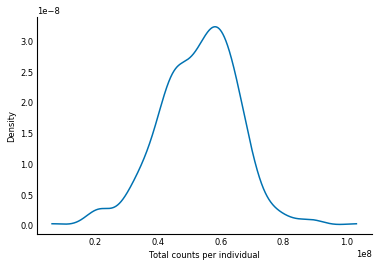

Count statistics:
 min: 6231205
 mean: 52995255.33866667
 max: 103219262


In [14]:
total_counts = np.sum(counts, axis=0) # (axis=1 would sum rows)

from scipy import stats

# Use Gaussian smoothing to estimate the density
density = stats.kde.gaussian_kde(total_counts)

# Make values for which to estimate the density, for plotting
x = np.arange(min(total_counts), max(total_counts), 10000)

# Make the density plot
fig, ax = plt.subplots()
ax.plot(x, density(x))
ax.set_xlabel('Total counts per individual')
ax.set_ylabel('Density')
plt.show()

print(f'Count statistics:\n min: {np.min(total_counts)}'
     f'\n mean: {np.mean(total_counts)}'
     f'\n max: {np.max(total_counts)}')